# Assessing the capacity of adaptive policies to adapt on time by mapping trigger values to their outcomes

Author: Luciano Raso, Delft University of Technology, Delft, The Netherlands. Section of Policy Analysis   
email: l.raso@tudelft.nl

In [1]:
#%matplotlib notebook 
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import scipy
from scipy import interpolate
from scipy.stats import gumbel_r, norm
import time
import matplotlib.lines as mlines
from IPython.display import Image

### Policy Problem

In the Netherlands, the most inhabited and economic valuable areas are also the most vulnerable to flood risk. A complex system of dikes protects the Randstad, the economic core of the country, which lays below the sea level. In this application we focus on the **Afsluitdijk**, a 32 long dam that functions as storm surge barrier, separating the Wadden Sea from the Lake Ijssel. % (see Figure 4, modified from floodsite.net). 
The national flood safety standards for the Afsluitdijk require a level of protection of **1 in 10.000-year**, Recently, a national assessment program concluded that The Afsluitdijk does not offer the required level of protection, therefore the Afsluitdijk will be renovated in the next future. 


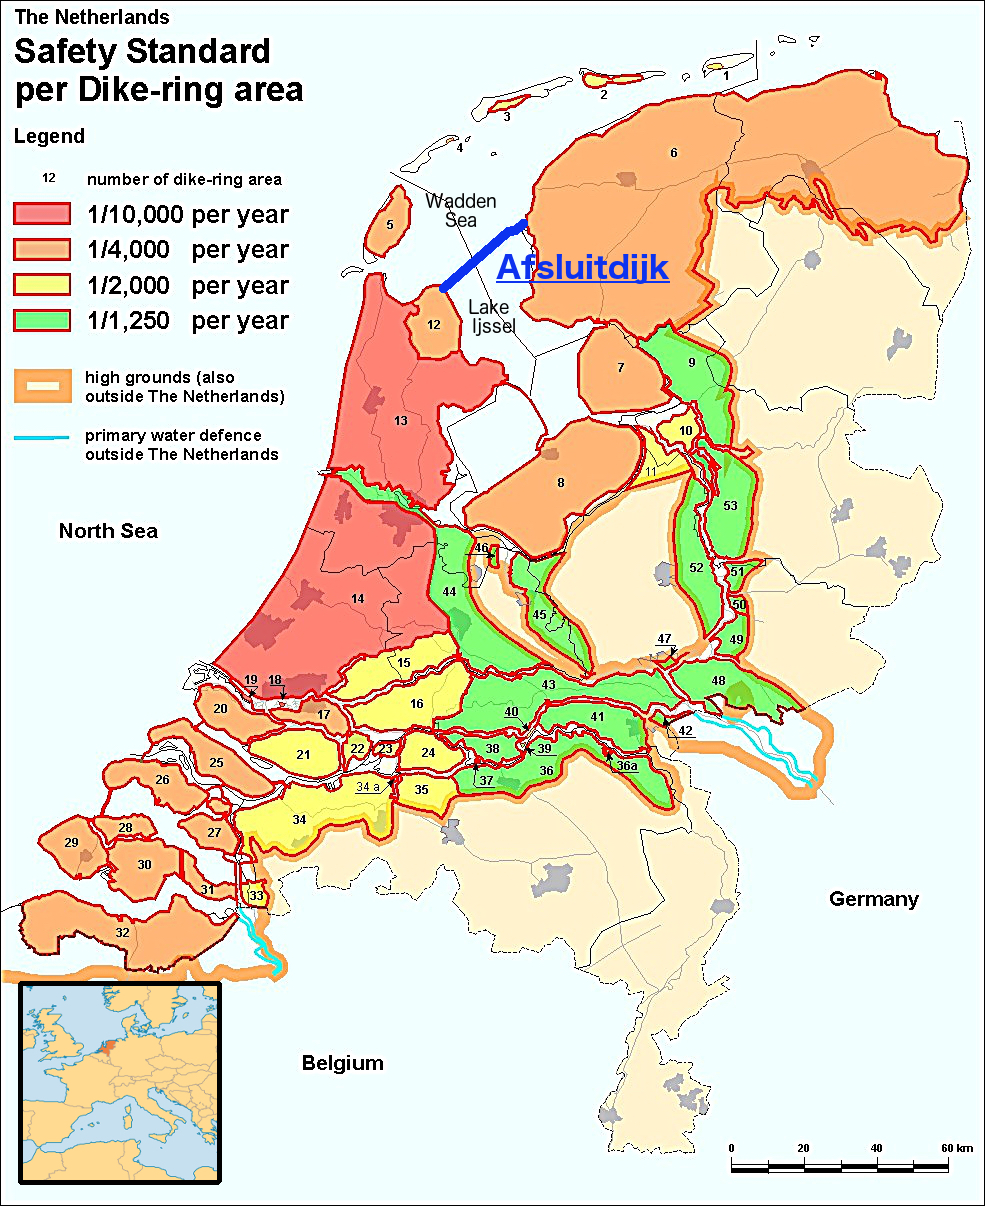

In [2]:
Image('../figures/Afsluitdijk/map_AsD.jpg',width=400)

### Critical Uncertainties, $\lambda$
In this application we will focus on critical uncertainties related to climatic conditions. The climatic uncertainties that are critical for the Afsluitdijk are related to the hydraulic boundary conditions that may change because of climate non-stationarity, and on which the level of protection of the dike depends. Specifically, we consider the following critical uncertainties:

* Rate of sea level rise
* Storm surge intensity


In [3]:
# dictionary of critical uncertainties ()
lambda_ = {}

In [4]:
# current conditions (CA) of critical uncertainties
lambda_['CA']= (3.6,1.9)

### Adaptive Policy
We consider an adaptive dike design created from features of both the ``2010 Robust alternative'', and the ``Wadden Werken'' alternative . Figure below show the pathways map of the adaptive policy and a schematic section of the dike and the alternative action for each pathway. 

We consider three possible adaptation pathways. In ``Zero Pathway'', the Aflsuitdijk retains its renovated form. In ``Protection Pathway'', a dike reinforcement is implemented by heightening the dike crown. In ``Nature Pathway'', the mass of the dike is reduced by removing part of the outer dike core, %, lowering the dike crown, 
adding a berm on the external side, and implementing building-with-nature solutions that increase the natural and recreational value of the dike \cite{janssen2014role}. The Protection or Nature Pathways are followed when the risk of dike failure turns out to be larger or smaller than initially expected. 
The adaptation decision is expected to be taken around 2050. This is in line with the current policy recommendation \cite{van2014advies}. The adaptation tipping point related to risk of dike failure are set to 1 in 5.000-year for the Protection Pathway, and 1 in 12.000-year, for the Nature Pathway.


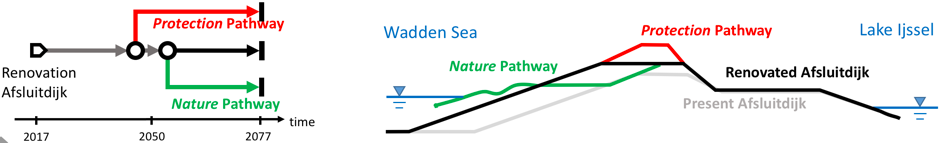

In [5]:
Image('../figures/Afsluitdijk/AfD_DAP_scheme.png',width=700)

In [6]:
#load stress test data
F = pd.read_csv('../data/Afsluitdijk/Stress_test.csv')
F.index = F['sea level rise rate']
del F['sea level rise rate']

FileNotFoundError: File b'../data/Afsluitdijk/Stress_test.csv' does not exist

In [7]:
# find tippint surface
F_tipping = 5000 # year^(-1)
f_tip_aux={}
for surge in F.index:
    f = interpolate.interp1d(F.loc[surge].values,np.array(F.columns))
    f_tip_aux[surge]=f(F_tipping)

NameError: name 'F' is not defined

In [14]:
f_tip = interpolate.interp1d

TypeError: unhashable type: 'numpy.ndarray'

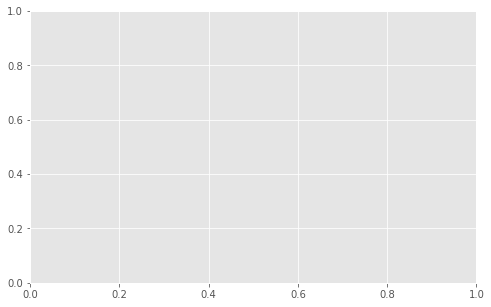

In [13]:
# plot Stress Test
fig = plt.figure(figsize=(8,5))
ax=fig.gca()
shift_text_right, shift_text_up = 0.5, 0.005

y = F.index
x = F.columns
X,Y = np.meshgrid(x,y)
F_val = F.values
p1 = ax.contourf(Y,X,F_val,cmap = "viridis",levels=np.array([5000, 10000, 12000]))

CS2 = plt.contour(p1, levels=np.array([5000]),colors='r',linewidths=4,label='Path Protection')
CS3 = plt.contour(p1, levels=np.array([12000]),colors='g',linewidths=4,label='Path Nature')

p2 = plt.plot(lambda_['CA'][0],lambda_['CA'][1],'o',markersize=10)
p3 = plt.text(lambda_['CA'][0]+shift_text_right,lambda_['CA'][1]+shift_text_up,'Current Condition',fontsize=12)

plt.ylim([1.7,2.4])
ax.set_title('Stress Test',fontsize=20)
ax.set_xlabel('Storm Surge Intensity $[m]$', fontsize=17)
ax.set_ylabel('Sea Level Rise Rate $[mm/year]$', fontsize=17)

cbar = plt.colorbar(p1)
#cbar.add_lines(p1)
cbar.ax.set_ylabel('Expected Frequency of Failure [year]')
# Add the contour line levels to the colorbar

# legend
blue_line = mlines.Line2D([], [], color='red',linewidth=4,
                           label='Protection Pathway')
red_line = mlines.Line2D([], [], color='green',linewidth=4,
                           label='Nature Pathway')
plt.legend(handles=[blue_line,red_line])
plt.xlim([-1,20])
plt.ylim([1.7,2.3])

## Selection of Adaptation Tipping Points

The construction of the T-P and the T-C plots requires selecting the adaptation tipping points and identifying the signpost uncertainty at both the adaptation tipping points and at current conditions. The following four adaptation tipping points are selected. 

* [$\lambda_{SLR+}$]    Increase in average sea level rise rate, constant storm intensity
* [$\lambda_{SS+}$] 	Increase in storm surge intensity, constant average sea level rise rate
* [$\lambda_{SLR-}$]	Reduction in average sea level rise rate, constant storm 
* [$\lambda_{SS-}$]	Reduction in storm surge intensity, constant average sea level rise rate



In [27]:
lambda_['SLR_plus'] = ( 18, 1.9 )
lambda_['SS_plus'] = ( 4 , 2.17 ) # Storm surge
lambda_['SLR_minus'] = ( 0, 1.9 )
lambda_['SS_minus'] = ( 3.6, 1.82 )

NameError: name 'F' is not defined

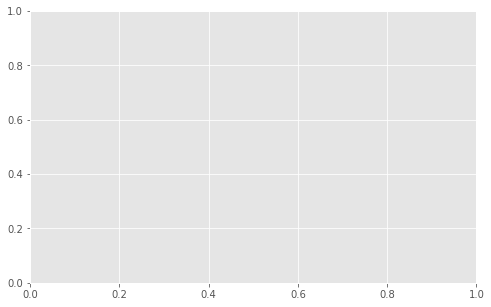

In [28]:
# plot Stress Test
fig = plt.figure(figsize=(8,5))
ax=fig.gca()
shift_text_right, shift_text_up = 0.5, 0.005

y=F.index
x=F.columns
X,Y=np.meshgrid(x,y)
F_val=F.values
p1=ax.contourf(Y,X,F_val,cmap ='viridis',levels=np.array([5000, 12000]))

CS2 = plt.contour(p1, levels=np.array([5000]),colors='r',linewidths=6,label='Path Protection')
CS3 = plt.contour(p1, levels=np.array([12000]),colors='g',linewidths=6,label='Path Nature')



p2=plt.plot(lambda_['CA'][0],lambda_['CA'][1],'ow',markersize=10)
p3=plt.text(lambda_['CA'][0]+shift_text_right,lambda_['CA'][1]+shift_text_up,'Current Condition',fontsize=16,color='white')


show_ATP=True

if show_ATP:
    p3=plt.plot(lambda_['SS_plus'][0],lambda_['SS_plus'][1],'ob',markersize=10)
    plt.text(lambda_['SS_plus'][0]+shift_text_right,lambda_['SS_plus'][1]+shift_text_up, '$\lambda_{SS+}$',fontsize=17)
    
    p4=plt.plot(lambda_['SLR_plus'][0],lambda_['SLR_plus'][1],'ob',markersize=10)
    plt.text(lambda_['SLR_plus'][0]-shift_text_right,lambda_['SLR_plus'][1]+4*shift_text_up, '$\lambda_{SLR+}$',fontsize=17)

    p5=plt.plot(lambda_['SLR_minus'][0],lambda_['SLR_minus'][1],'ob',markersize=10)
    plt.text(lambda_['SLR_minus'][0]+shift_text_right,lambda_['SLR_minus'][1]+shift_text_up, '$\lambda_{SLR-}$',fontsize=17)

    p6=plt.plot(lambda_['SS_minus'][0],lambda_['SS_minus'][1],'ob',markersize=10)
    plt.text(lambda_['SS_minus'][0]+shift_text_right,lambda_['SS_minus'][1]+shift_text_up, '$\lambda_{SS-}$',fontsize=17)



plt.ylim([1.7,2.4])

#ax.set( title='Stress Test')

ax.set_title('Stress Test (van der Meer model)',fontsize=17)
ax.set_ylabel('Storm Surge Intensity $[m]$', fontsize=17)
ax.set_xlabel('Sea Level Rise Rate $[mm/year]$', fontsize=17)


#plt.contourf(data_array, ,
#            ))
#plt.title("Stress test")
#cbar = plt.colorbar(p1)
#cbar.add_lines(p1)
cbar.ax.set_ylabel('Expected Frequency of Failure [year]')
# Add the contour line levels to the colorbar

# legend
blue_line = mlines.Line2D([], [], color='red',linewidth=4,
                           label='Protection Pathway')
red_line = mlines.Line2D([], [], color='green',linewidth=4,
                           label='Nature Pathway')
plt.legend(handles=[blue_line,red_line],fontsize=15)
plt.xlim([-1,20])
plt.ylim([1.7,2.3])
#plt.savefig(pathfig+"StressTest2.pdf")


All adaptation tipping points are on the boundary of the policy success region, as represented in the stress test plot of Figure above. Tipping point $\lambda_{SLR+}$ and $\lambda_{SS+}$ represent a increased flood risk. Reaching one of these tipping points activates the Protection Pathway. Tipping point $\lambda_{SLR-}$ and $\lambda_{SS-}$ represent a reduced flood risk. Reaching one of these tipping points activates the Nature Pathway. We estimate below $P(S|\lambda)$ at these tipping points and at current conditions is described in the additional material available online. 


## Signpost evaluation

Note: All signposts are defined as average over a moving window, therefore they converge to normal distribution. We consider all signposts being unbiased estimator of the parameters that they track. 

### Trigger-Probability Mapping

In [29]:
def T_P(P0,P1,S_star_range):
    """ Create the Trigger-Probability mapping   


    """    
    
    def prob_errors(P0,P1,S):
    
        significance = 1- P0.cdf(S)
        power =  P1.cdf(S)
        return (significance,power)
    
    
    def prob_errors_sample_cdf(sample_0,sample_1,S):
        
        significance = 1 - sum(i < S for i in sample_0) / len(sample_0)
        power =  sum(i < S for i in sample_1) / len(sample_1)
        return (significance,power)

    
    
    S_star_r=pd.DataFrame([],index=S_star_range,columns=['significance','power'])
    S_star_r.index.rename('S')
    
    #test
    if type (P0) == type(P1) == scipy.stats._distn_infrastructure.rv_frozen:
        P_analytical=True
    elif type(P0) == type(P1) == np.ndarray:
        P_analytical=False
    else:
        raise ValueError('Probability P0 or P1 not of the right (or same) type')
    
    #do
    for S_star in S_star_range:
        if P_analytical:
            [significance,power] = prob_errors(P0,P1,S_star)
            S_star_r.loc[S_star]['significance']=significance
            S_star_r.loc[S_star]['power']=power
        else: #P empirical
            [significance,power] = prob_errors_sample_cdf(P0,P1,S_star)
            S_star_r.loc[S_star]['significance']=significance
            S_star_r.loc[S_star]['power']=power
    return(S_star_r)


def S_empirical_cdf(signpost,lambda_id,N=3000):
    """ Create a sample of signpost estimates of dimension N at critical uncertainties lambda_id
    """

    S_estimation=np.empty(N)
    for i in range(N):
        data_series=pd.Series(signpost.P_S_lambda[lambda_id].rvs(size=signpost.window+1))
        S_estimation[i]=signpost.statistic(data_series).loc[signpost.window]   
    return (S_estimation)


# specifics for the plot
T_P_specifics = lambda S:plt.gca().set(ylim=[-0.01,1.05],title=S.name+', trigger-probability mapping',xlabel='Trigger value ['+S.unit+']',ylabel='Probability')

### Definition of Signposts

In [30]:
class Signpost:
    def __init__(self,name,unit):
        self.name=name
        self.unit=unit
        self.statistic=[]
        self.P_S_lambda={}

### $S_{A}$

* Definition: sea level rise rate at den Oever, on a 10-year moving window average
* Parameter tracking: average sea level rise rate 


In [31]:
S_SLR=Signpost('$S_A$','mm/year')
S_SLR.window = 10 # years

#### Estimation of $P(S|\lambda)$
The distribution of $S_A$ is identified in Expression below:
\begin{equation}\label{S_A}
S_A \sim \mathcal {N} \left(SLR, \frac{ \sigma_{SWL}^2}{VAR([1 .. 10]) } \right) 
\end{equation}
Where SLR is the sea level rise rate, $\sigma_{SLR}$ is the observational uncertainty of the yearly value, estimated at den Oever station, and $[1 .. 10]$ the integer interval between 1 and the length of the average moving window.

In [32]:
sigma_year_SWL = 6 # mm / year # variance of yearly sea water level observations (observational uncertainty)
sigma_S_SLR = sigma_year_SWL / np.var(np.arange(S_SLR.window))

S_SLR.P_S_lambda['CA'] = norm(loc=lambda_['CA'][0],scale=np.sqrt(sigma_S_SLR))
S_SLR.P_S_lambda['SLR_plus'] = norm(loc=lambda_['SLR_plus'][0],scale=np.sqrt(sigma_S_SLR))
S_SLR.P_S_lambda['SS_plus'] = norm(loc=lambda_['SS_plus'][0],scale=np.sqrt(sigma_S_SLR))

In [33]:
## $'SLR_plus'$
S_SLR_range=np.arange(0,27,0.5)
SLR_T_PS={}
SLR_T_PS['SLR_plus']=T_P(S_SLR.P_S_lambda['CA'],S_SLR.P_S_lambda['SLR_plus'],S_SLR_range)
SLR_T_PS['SS_plus']=T_P(S_SLR.P_S_lambda['CA'],S_SLR.P_S_lambda['SS_plus'],S_SLR_range)

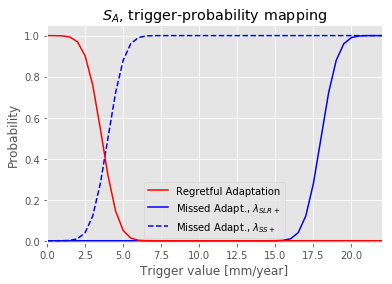

In [34]:
# plotting
a,=plt.plot(SLR_T_PS['SLR_plus']['power'],color='b',label='Missed Adapt., $\lambda_{SLR+}$')
b,=plt.plot(SLR_T_PS['SS_plus']['power'],color='b',linestyle='--',label='Missed Adapt., $\lambda_{SS+}$')
c,=plt.plot(SLR_T_PS['SLR_plus']['significance'],color='r',label='Regretful Adaptation')

T_P_specifics(S_SLR)


plt.legend(handles=[c,a,b],loc=0,fontsize=10)
plt.xlim([0,22])

plt.savefig("../Figures/Afsluitdijk/S_A.pdf")

plt.show()

### $S_{E}$

* Definition: Average of yearly maximum water level at den Oever, on a 20-year moving window average, i.e. $S_E = \frac{1}{w}\sum_y^w MWL_y$, where $MWL_y$ is the maximum water level at year $y$

* Parameter tracking: Yearly maximum water level

In [35]:
S_SS=Signpost(name='$S_E$',unit='m')
S_SS.window=20
S_SS.statistic=lambda yearly_max_data: pd.Series(yearly_max_data).rolling(S_SS.window).mean()

#### Estimation of $P(S|\lambda)$
The distribution of Signposts $S_E$ is identified from its empirical distribution. The empirical distributions are identified from the definition of these signposts, sampling from SS, where $SS \sim GEV (\mu_{SS},\sigma_{SS})$ is the storm surge intensity.


In [36]:
sigma_hist = 0.60 # 

n_years = 30 # years
conv_factor = 1000 # from mm to m

S_SS.P_S_lambda['lambda_CA'] = gumbel_r (loc = lambda_['CA'][1] + n_years / conv_factor * lambda_['CA'][0], scale = sigma_hist )
S_SS.P_S_lambda['SLR_plus'] = gumbel_r (loc = lambda_['SLR_plus'][1] + n_years / conv_factor * lambda_['SLR_plus'][0], scale = sigma_hist )
S_SS.P_S_lambda['SS_plus'] = gumbel_r (loc = lambda_['SS_plus'][1] + n_years / conv_factor * lambda_['SS_plus'][0] , scale = sigma_hist )

# tipping point 3 and 4
S_SS.P_S_lambda['SLR_minus'] = gumbel_r (loc = lambda_['SLR_minus'][1] + n_years / conv_factor * lambda_['SLR_minus'][0], scale = sigma_hist )
S_SS.P_S_lambda['SS_minus'] = gumbel_r (loc = lambda_['SS_minus'][1] + n_years / conv_factor * lambda_['SS_minus'][0] , scale = sigma_hist )


In [37]:
S_SS_est={}
for lambda_id in S_SS.P_S_lambda:    
    S_SS_est[lambda_id]=S_empirical_cdf(S_SS,lambda_id)

In [38]:
### $S_{SS}$
SS_T_PS={}

In [39]:
S_SS_range=np.arange(1.3,3.6,0.05)
SS_T_PS['SLR_plus']=T_P(S_SS_est['lambda_CA'],S_SS_est['SLR_plus'],S_SS_range)
SS_T_PS['SS_plus']=T_P(S_SS_est['lambda_CA'],S_SS_est['SS_plus'],S_SS_range)

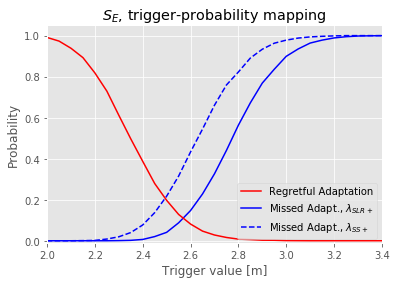

In [40]:
# plotting 
fig, ax = plt.subplots()
a,=plt.plot(SS_T_PS['SLR_plus']['power'],color='b',label='Missed Adapt., $\lambda_{SLR+}$')
b,=plt.plot(SS_T_PS['SS_plus']['power'],color='b',linestyle='--',label='Missed Adapt., $\lambda_{SS+}$')
c,=plt.plot(SS_T_PS['SLR_plus']['significance'],color='r',label='Regretful Adaptation')

band=False
if band:
    ax.fill_between(SS_T_PS['SLR_plus']['power'].index,
                SS_T_PS['SLR_plus']['power'].values.astype(np.float64),
                SS_T_PS['SS_plus']['power'].values.astype(np.float64),
                color='blue',label='Power',alpha=0.1)

plt.legend(handles=[c,a,b],bbox_to_anchor=(1, 0.3),fontsize=10)

T_P_specifics(S_SS)
#add_legend('$\lambda_{SLR+}$','$\lambda_{SS+}$')
plt.xlim([2,3.4])
plt.savefig("../Figures/Afsluitdijk/S_E.pdf")
plt.ylabel('Probability')
plt.show()

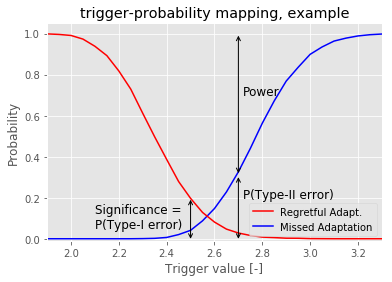

In [58]:
# Generic plot

a,=plt.plot(SS_T_PS['SLR_plus']['power'],color='b',label='Missed Adaptation')
#b,=plt.plot(1-SS_T_PS['SS_plus']['power'],color='b',label='$1-$ Power')
c,=plt.plot(SS_T_PS['SLR_plus']['significance'],color='r',label='Regretful Adapt.')
plt.legend(handles=[c,a],loc=4,fontsize=10)

#add_legend('$\lambda_{SLR+}$','$\lambda_{SS+}$')
plt.gca().set(ylim=[-0.01,1.05],title='trigger-probability mapping, example',xlabel='Trigger value [-]')
plt.xlim([1.9,3.3])
plt.ylabel('Probability')

plt.text(2.1,0.05,'Significance =\nP(Type-I error)',fontsize=12)
plt.text(2.72,0.7,'Power',fontsize=12)

plt.text(2.72,0.2,'P(Type-II error)',fontsize=12)

#plt.plot([0,3],[0,0],'-k')
#plt.annotate ('dd', (2, 0), (3, 1))#, arrowprops={'arrowstyle':'<->'})

plt.annotate ('', (2.5, -0.01), (2.5, 0.2), arrowprops={'arrowstyle':'<->','color':'black','linewidth':1})
plt.annotate ('', (2.7, 0.31), (2.7, 1), arrowprops={'arrowstyle':'<->','color':'black','linewidth':1})
plt.annotate ('', (2.7, -0.01), (2.7, 0.31), arrowprops={'arrowstyle':'<->','color':'black','linewidth':1})

plt.savefig("../Figures/Afsluitdijk/Generic_T_P.pdf")

plt.show()

### Consequences of adaptation
With respect to the adaptation required for the Path Protection, the consequence of regretful adaptation is the cost of enriching the dike, estimated at 380 million euro. The consequence of missed adaptation is the total additional risk for being at the adaptation tipping point. Risk is defined as the probability of dike failure multiplied by its consequences; additional is defined with respect to the situation at the current conditions. The total risk at current condition due to failure of the Afsluitdijk are estimated at 320 million euro. For the Afsluitdijk, the probability of failure at the adaptation tipping point is twice the probability of failure at current conditions, therefore the risk is double. Consequently, the total additional risk for being at the adaptation tipping point is the same amount of the total risk at current condition. 

In [43]:
cost_matrix_AfD=np.matrix([[0, 380],  
                 [320, 0]])

## Trigger-Consequences Mapping

In [44]:
def T_C(P0,P1,S_star_range,cost_matrix):
    """"Trigger-Consequence mapping
    """ 
    S_star_r=T_P(P0,P1,S_star_range)
    S_star_costs=pd.DataFrame([],index=S_star_r.index,columns=['Missed Adaptation','Regretful Adaptation','Total'])

    for S_star in S_star_costs.index:
        prob_matrix=np.matrix([[S_star_r.loc[S_star]['power'],S_star_r.loc[S_star]['significance']],
                         [S_star_r.loc[S_star]['power'],S_star_r.loc[S_star]['significance']]])
        expected_costs=np.multiply(cost_matrix, prob_matrix)
        S_star_costs.loc[S_star]['Missed Adaptation']=expected_costs[1,0]
        S_star_costs.loc[S_star]['Regretful Adaptation']=expected_costs[0,1]
        S_star_costs.loc[S_star]['Total']=expected_costs[0,1]+expected_costs[1,0]
    return(S_star_costs)

T_C_specifics = lambda S:plt.gca().set(title=S.name+', trigger-consequences mapping',xlabel='Trigger value ['+S.unit+']',ylabel='cost of uncertainty [M€]')

#### Generic trigger-consequences plot

In [47]:
generic_cost_matrix = np.matrix([[0, 1],  
                 [2, 0]])
SS_T_C={}
SS_T_C['SLR_plus']=T_C(S_SS_est['lambda_CA'],S_SS_est['SLR_plus'],S_SS_range,generic_cost_matrix)


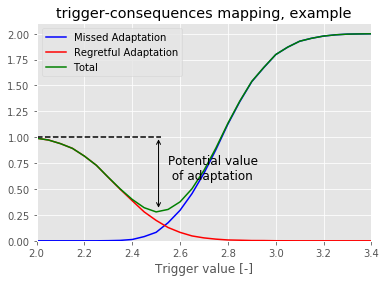

In [59]:
a,=plt.plot(SS_T_C['SLR_plus']['Missed Adaptation'],color='b',label='Missed Adaptation')
b,=plt.plot(SS_T_C['SLR_plus']['Regretful Adaptation'],color='r',label='Regretful Adaptation')
c,=plt.plot(SS_T_C['SLR_plus']['Total'],color='g',label='Total')
plt.plot([2,2.52],[1,1],'--k')


# T_C_specifics(S_SS)
#plt.gca().set(ylim=[-0.01,1.05],title='',xlabel=)

plt.title('trigger-consequences mapping, example')
plt.xlabel('Trigger value [-]')
plt.xlim([2,3.4])
plt.ylim(0)
plt.legend(handles=[a,b,c])
plt.annotate ('', (2.51, 1), (2.51, 0.3), arrowprops={'arrowstyle':'<->','color':'black','linewidth':1})
plt.text(2.55,0.6,'Potential value \n of adaptation',fontsize=12)
plt.savefig("../Figures/Afsluitdijk/Generic_TC.pdf")

In [93]:
SS_T_C={}
SS_T_C['SLR_plus']=T_C(S_SS_est['lambda_CA'],S_SS_est['SLR_plus'],S_SS_range,cost_matrix_AfD)
SS_T_C['SS_plus']=T_C(S_SS_est['lambda_CA'],S_SS_est['SS_plus'],S_SS_range,cost_matrix_AfD)

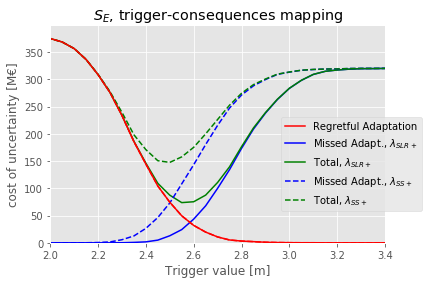

In [83]:
# plotting 
a,=plt.plot(SS_T_C['SLR_plus']['Missed Adaptation'],color='b',label='Missed Adapt., $\lambda_{SLR+}$')
c,=plt.plot(SS_T_C['SLR_plus']['Total'],color='g',label='Total, $\lambda_{SLR+}$')
d,=plt.plot(SS_T_C['SS_plus']['Missed Adaptation'],linestyle='--',color='b',label='Missed Adapt., $\lambda_{SS+}$')
e,=plt.plot(SS_T_C['SS_plus']['Regretful Adaptation'],linestyle='--',color='r',label='Regretful Adapt., $\lambda_{SS+}$')
f,=plt.plot(SS_T_C['SS_plus']['Total'],linestyle='--',color='g',label='Total, $\lambda_{SS+}$')
b,=plt.plot(SS_T_C['SLR_plus']['Regretful Adaptation'],color='r',label='Regretful Adaptation')
            
            
#plt.plot(SS_T_C['SLR_plus'])
#plt.plot(SS_T_C['SS_plus'],linestyle='--')

T_C_specifics(S_SS)
plt.xlim([2,3.4])
plt.ylim(0)
plt.legend(handles=[b,a,c,d,f],loc='upper center',bbox_to_anchor=(0.90, 0.6))
plt.savefig("../Figures/Afsluitdijk/S_SS_TC1.pdf")


plt.show()

#### $S_E$, Adaptation to Pathway Nature

In [62]:
SS_T_PS['SLR_minus']=T_P(S_SS_est['lambda_CA'],S_SS_est['SLR_minus'],S_SS_range)
SS_T_PS['SS_minus']=T_P(S_SS_est['lambda_CA'],S_SS_est['SS_minus'],S_SS_range)

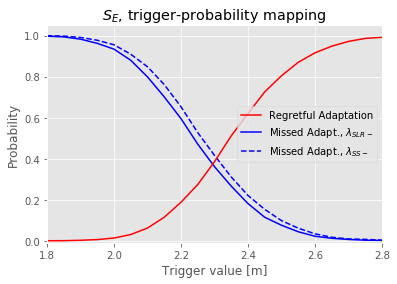

In [76]:
# plotting 
b,=plt.plot(1-SS_T_PS['SLR_minus']['power'],color='b',label='Missed Adapt., $\lambda_{SLR-}$')
c,=plt.plot(1-SS_T_PS['SS_minus']['power'],color='b',label='Missed Adapt., $\lambda_{SS-}$',linestyle='--')
a,=plt.plot(1-SS_T_PS['SLR_minus']['significance'],color='r',label='Regretful Adaptation')
plt.legend(handles=[a,b,c],loc=0,fontsize=10)

T_P_specifics(S_SS)
#add_legend('$\lambda_{SLR-}$','$\lambda_{SS-}$')
plt.xlim([1.8,2.8])
plt.savefig("../Figures/Afsluitdijk/S_E_nature.pdf")

plt.show()

### $S_{RE}$
Signpost $S_{RE}$ is equivalent to $S_E$, but it uses the corrected data of **10 stations** in the neighbouring of Den Oever. We assume no correlation among stations.

In [64]:
n_stations=10

S_RE=Signpost(name='$S_{RE}$',unit='$m$')
S_RE.window=20*n_stations
S_RE.statistic=lambda yearly_max_data: pd.Series(yearly_max_data).rolling(S_RE.window).mean()

#### $S_{RE}$, Adaptation to Pathway Nature

In [65]:
S_RE.P_S_lambda['lambda_CA'] = S_SS.P_S_lambda['lambda_CA']
S_RE.P_S_lambda['SLR_minus'] = S_SS.P_S_lambda['SLR_minus']
S_RE.P_S_lambda['SS_minus'] = S_SS.P_S_lambda['SS_minus']

In [66]:
S_RE_est={}
for lambda_id in S_RE.P_S_lambda:    
    S_RE_est[lambda_id] = S_empirical_cdf(S_RE,lambda_id)

In [67]:
RE_T_P = {}
S_RE_range = np.arange(1.5,3,0.01)
RE_T_P['SLR_minus'] = T_P(S_RE_est['lambda_CA'],S_RE_est['SLR_minus'],S_RE_range)
RE_T_P['SS_minus'] = T_P(S_RE_est['SLR_minus'],S_RE_est['SS_minus'],S_RE_range)

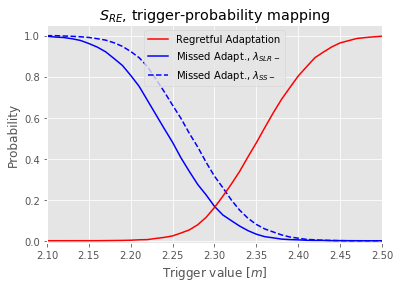

In [79]:
# plotting 
b,=plt.plot(1-RE_T_P['SLR_minus']['power'],color='b',label='Missed Adapt., $\lambda_{SLR-}$')
c,=plt.plot(1-RE_T_P['SS_minus']['power'],color='b',label='Missed Adapt., $\lambda_{SS-}$',linestyle='--')
a,=plt.plot(1-RE_T_P['SLR_minus']['significance'],color='r',label='Regretful Adaptation')
plt.legend(handles=[a,b,c],loc=0,fontsize=10)

T_P_specifics(S_RE)
#add_legend('$\lambda_{SLR-}$','$\lambda_{SS-}$')
plt.xlim([2.1,2.5])
#plt.savefig("../Figures/S_RSS1.pdf")
plt.savefig("../Figures/Afsluitdijk/S_RE_nature.pdf")

plt.show()